In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words= 10000)

In [24]:
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [25]:
model = Sequential([
    Embedding(input_dim=10000,output_dim=32,input_shape=(100,)),
    SimpleRNN(5,return_sequences=True, kernel_regularizer=l2(0.01)),
    SimpleRNN(5, kernel_regularizer=l2(0.01)),
    Dense(1,activation="sigmoid")
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_8 (SimpleRNN)        │ (None, 100, 5)         │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,251 (1.22 MB)

 Trainable params: 320,251 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer="adam",loss = "binary_crossentropy",metrics=["accuracy"])

In [21]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.7207 - loss: 0.6498 - val_accuracy: 0.8118 - val_loss: 0.4816
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.8714 - loss: 0.3691 - val_accuracy: 0.8160 - val_loss: 0.4472
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9061 - loss: 0.2828 - val_accuracy: 0.8356 - val_loss: 0.4140
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9314 - loss: 0.2196 - val_accuracy: 0.8300 - val_loss: 0.4213
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9473 - loss: 0.1843 - val_accuracy: 0.8288 - val_loss: 0.4702
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9618 - loss: 0.1448 - val_accuracy: 0.8154 - val_loss: 0.5073


overfitting as model is complex for the small data


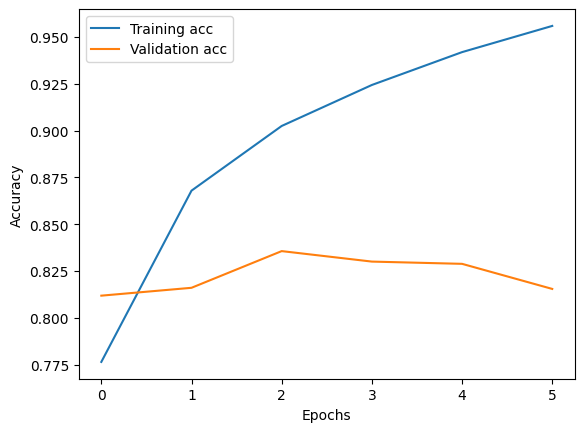

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="Training acc")
plt.plot(history.history["val_accuracy"],label="Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()